<a href="https://colab.research.google.com/github/locdeng/Algorithm_03/blob/main/Unsuspervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning**

Assignment 2 - Unsupervised learning

In [66]:
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms


In [40]:
#from google.colab import files
#files.upload()


#store dataset
#df = pd.read_csv('fashion-mnist_test.csv', encoding='unicode_escappe', error_bad_lines=False)

In [67]:
Fashion_mnist_test_transform = transforms.Compose([transforms.ToTensor()])

testset_Fashion_mnist = datasets.FashionMNIST(root='./data', train=False, download=True,
transform = Fashion_mnist_test_transform)

FM_test = DataLoader(testset_Fashion_mnist, batch_size=32, shuffle=False, num_workers=2)

FM_test_images = []
FM_test_labels = []

for batch in FM_test:
    images, labels = batch
    images_flat = images.view(images.shape[0], -1)
    FM_test_images.append(images_flat.numpy())
    FM_test_labels.append(labels.numpy())
FM_test_images = np.vstack(FM_test_images)
FM_test_labels = np.concatenate(FM_test_labels)

In [68]:
X_ = pd.DataFrame(data=FM_test_images) # test data
y_ = pd.Series(data=FM_test_labels) # test label

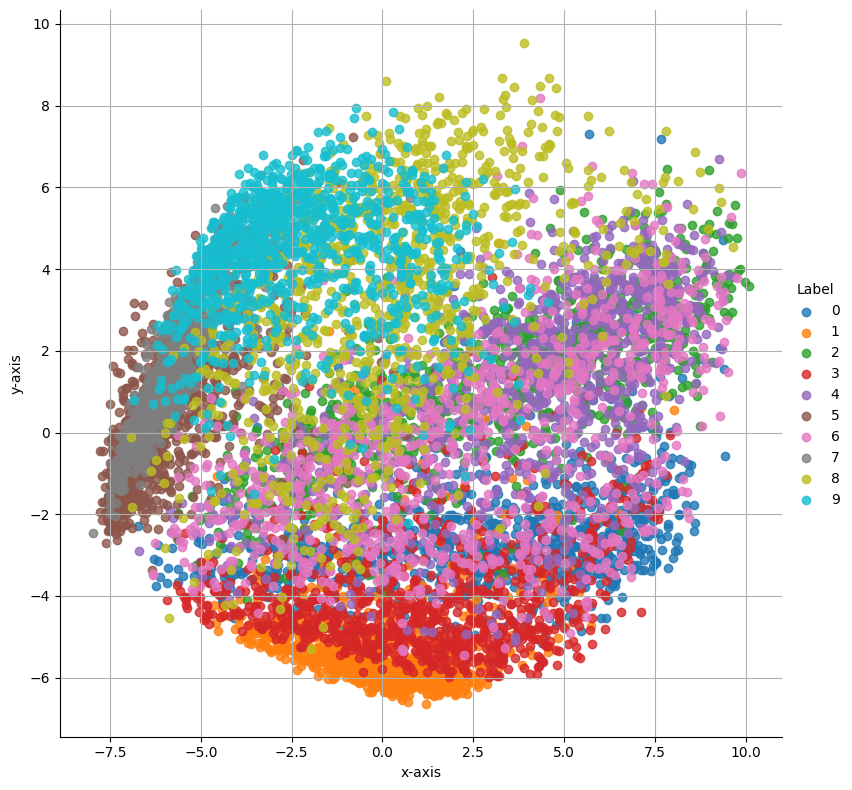

In [69]:
pca = PCA(n_components= 50)
test_PCA = pca.fit_transform(X_)
test_PCA = pd.DataFrame(data = test_PCA)

testDF = pd.DataFrame(data=test_PCA.loc[:,0:1], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.grid()


In [71]:
n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate,
         perplexity=perplexity, early_exaggeration=early_exaggeration, init=init)

In [72]:
tSNE = TSNE(n_components=n_components,)

In [ ]:
'''
X_test_tSNE = tSNE.fit_transform(test_PCA.loc[:,:])
X_test_tSNE = pd.DataFrame(data=X_test_tSNE)
testDF = pd.DataFrame(data=X_test_tSNE.loc[:,:], index=test_PCA.index)
testDF = pd.concat((testDF,y_), axis=1, join="inner")
testDF.columns = ["x-axis", "y-axis", "Label"]
  
testDF["Label"] = labels
sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
plt.title("Clustering Result")
'''

In [ ]:
# Set DBSCAN and K-means hyperparameters
#k=10
eps = 0.5
min_neighbors = 5

In [75]:
# Perform PCA with different dimensions
pca_dims = [784, 100, 50, 10]
test_PCA = {}
#kmeans = {}
test_DBSCAN = {}
ari_scores = []

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


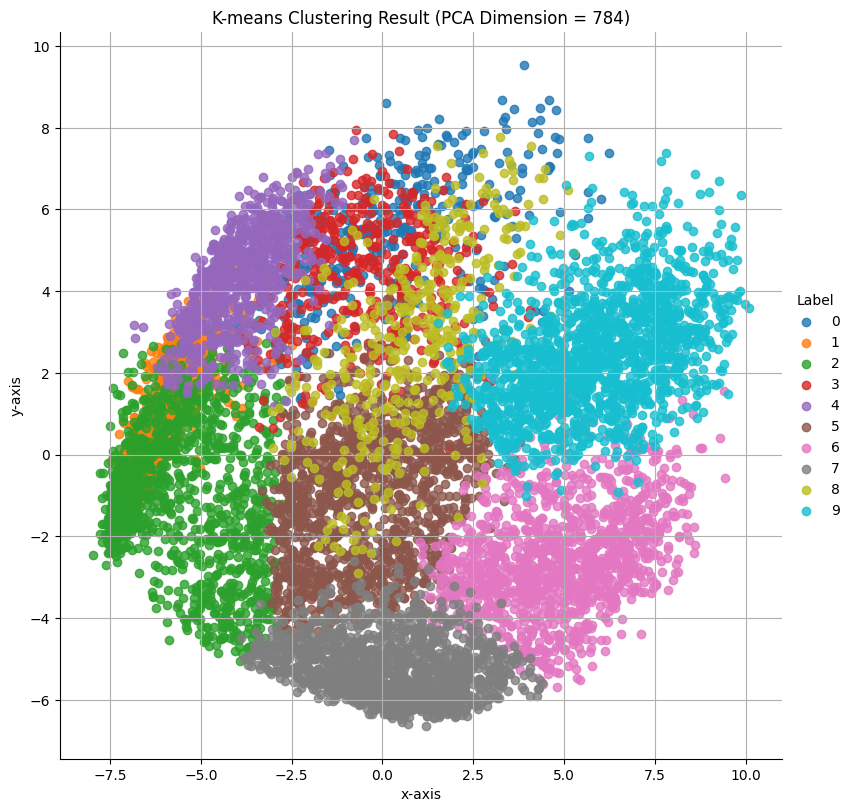

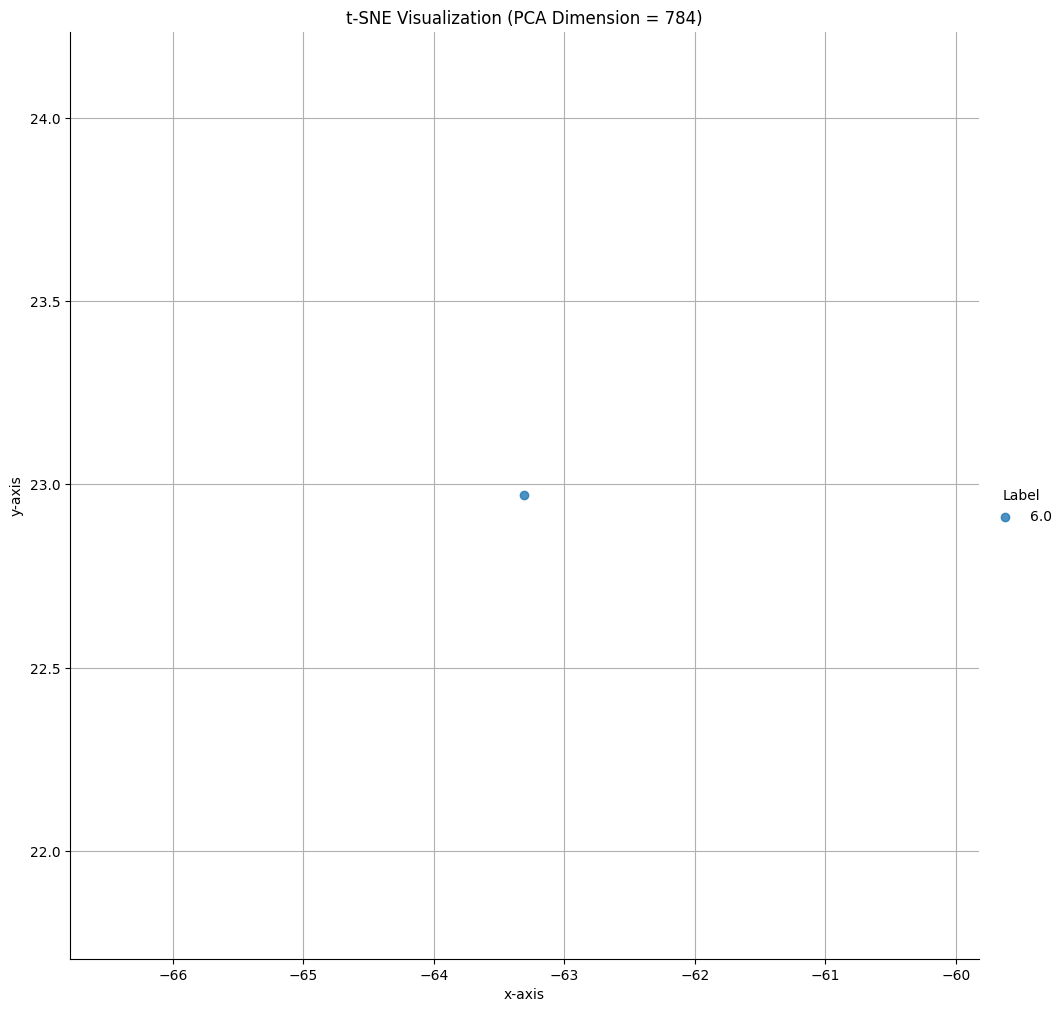

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


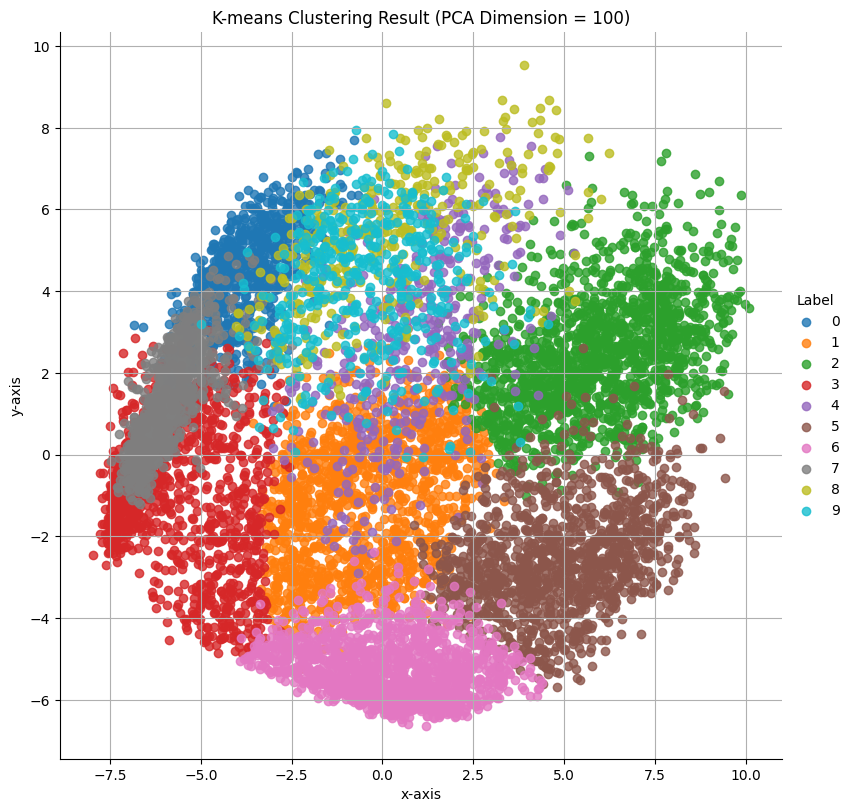

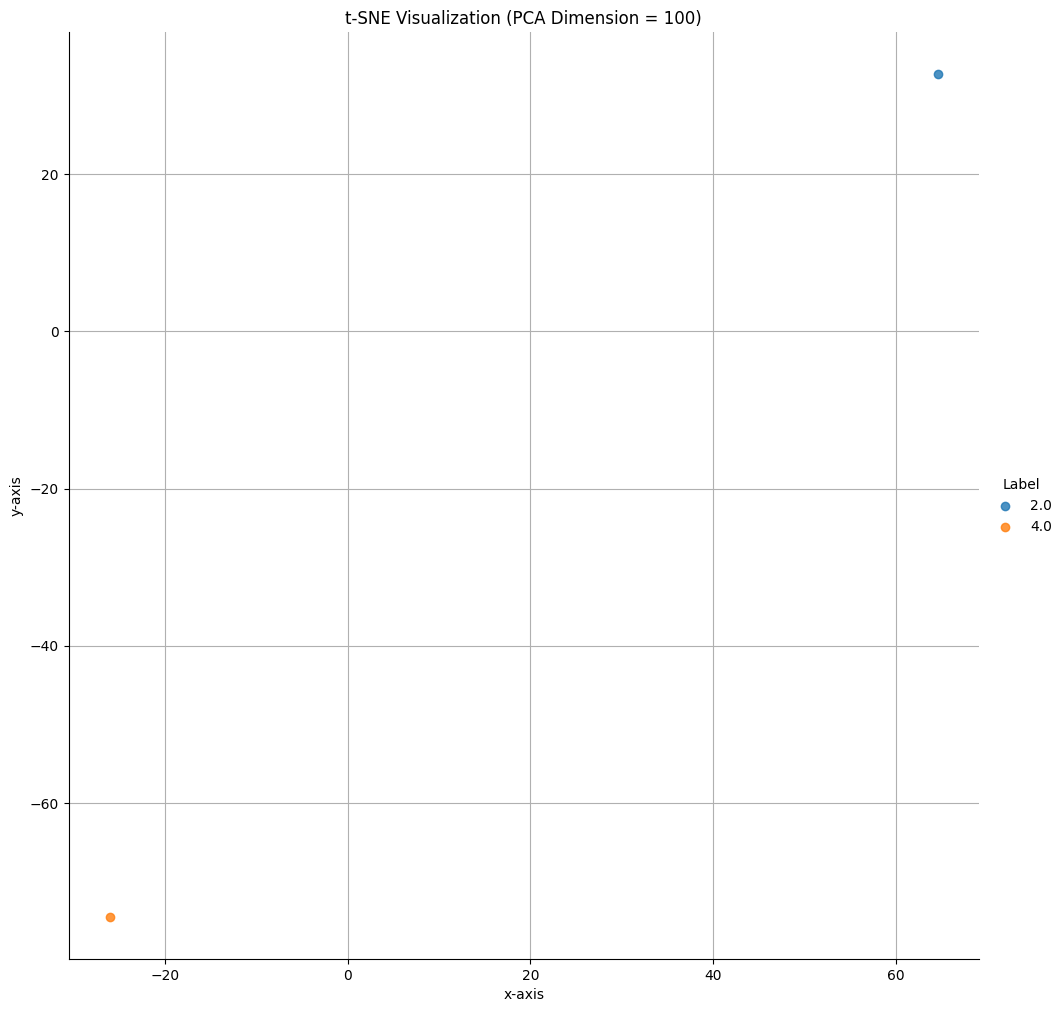

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


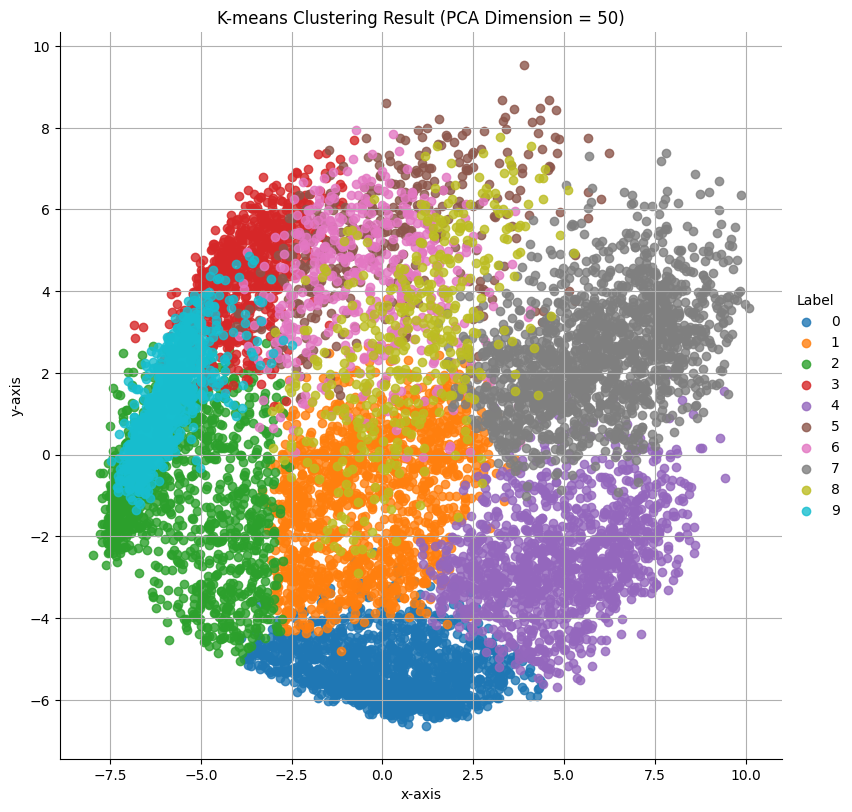

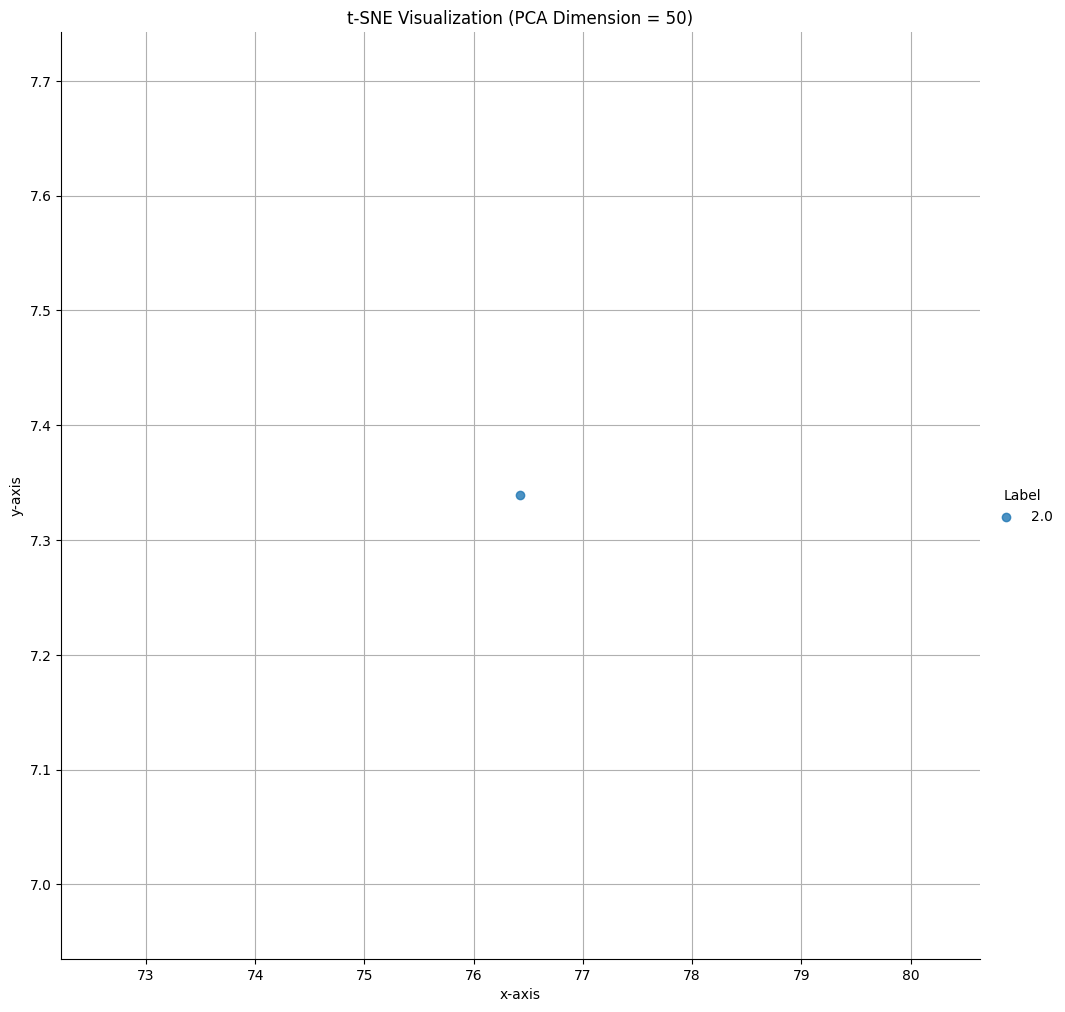

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


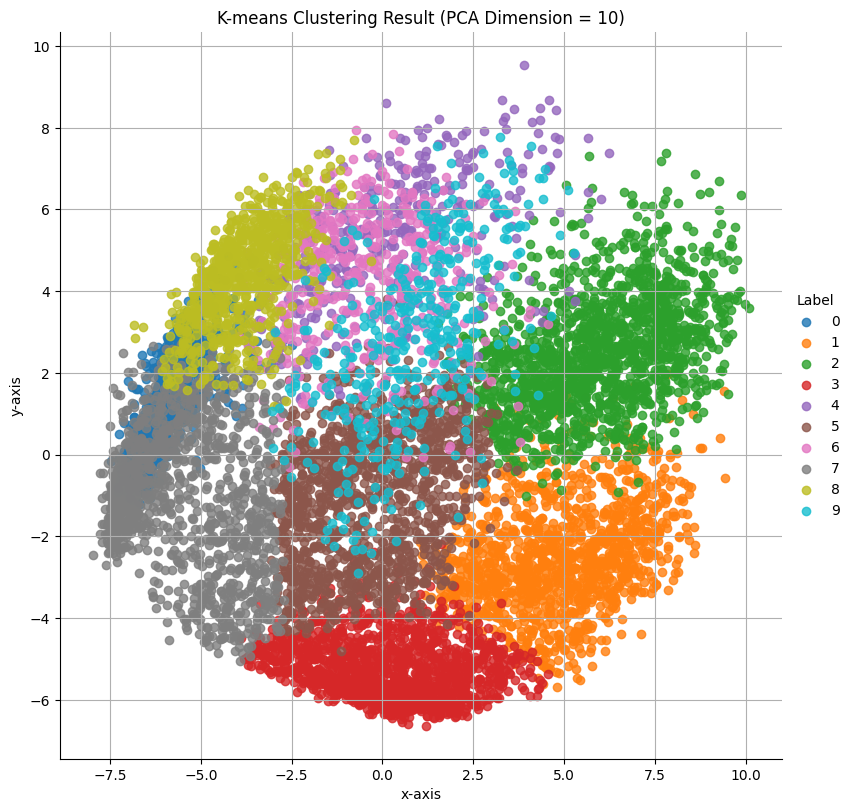

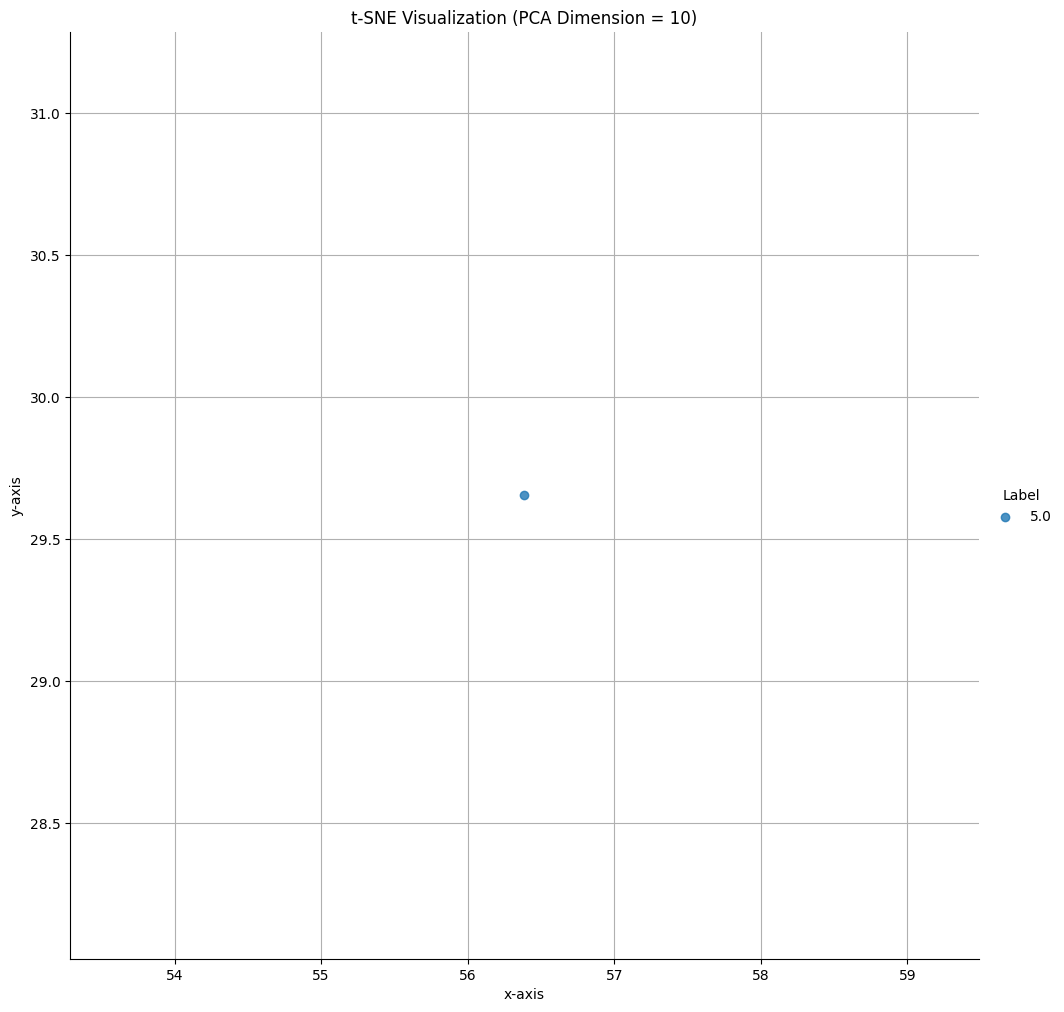

Adjusted Rand Index (ARI) Scores:
   Dimension  ARI Score
0        784   0.349780
1        100   0.351255
2         50   0.349116
3         10   0.348739


In [76]:

for dim in pca_dims:
    # Perform PCA
    pca = PCA(n_components=dim)
    test_PCA[dim] = pca.fit_transform(X_)

    '''
    # Run k-means clustering
    kmeans[dim] = KMeans(n_clusters=k, random_state=42)
    kmeans[dim].fit(test_PCA[dim])
    labels = kmeans[dim].labels_
    '''

    # Run DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_neighbors)
    labels = dbscan.fit_predict(test_PCA)

    # Compute ARI
    ari = adjusted_rand_score(y_, labels)
    ari_scores.append(ari)

    # Create a DataFrame for visualization
    testDF = pd.DataFrame(data=test_PCA[dim][:, :2], columns=["x-axis", "y-axis"])
    testDF["Label"] = labels
 
    '''
    # Plot the results for K-means
    sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
    plt.title(f"K-means Clustering Result (PCA Dimension = {dim})")
    plt.grid()
    plt.show()
    '''

    # Plot the results for DBSCAN
    sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=testDF, fit_reg=False, height=8)
    plt.title(f"DBSCAN Clustering Result (Dimension = {dim})")
    plt.grid()
    plt.show()

    # Perform t-SNE on the reduced dimensions
    tSNE = TSNE(n_components=2, random_state=42)
    X_tSNE = tSNE.fit_transform(test_PCA[dim])

    # Randomly choose 100 samples for visualization
    random_indices = np.random.choice(X_tSNE.shape[0], size=100, replace=False)
    X_tSNE_sample = X_tSNE[random_indices]
    y_sample = y_[random_indices]

    # Create a DataFrame for visualization
    tSNE_df = pd.DataFrame(data=X_tSNE_sample, columns=["x-axis", "y-axis"])
    tSNE_df["Label"] = y_sample

    # Plot the t-SNE visualization
    sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=tSNE_df, fit_reg=False, height=10)
    plt.title(f"t-SNE Visualization (PCA Dimension = {dim})")
    plt.grid()
    plt.show()

# Create a table for ARI scores
ari_table = pd.DataFrame(data={"Dimension": pca_dims, "ARI Score": ari_scores})

print("Adjusted Rand Index (ARI) Scores:")
print(ari_table)